In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=df.drop(["User ID"],axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

In [ ]:
df.shape

(400, 4)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[63  5]
 [ 3 29]]


0.92

Text(70.72222222222221, 0.5, 'Real Labels')

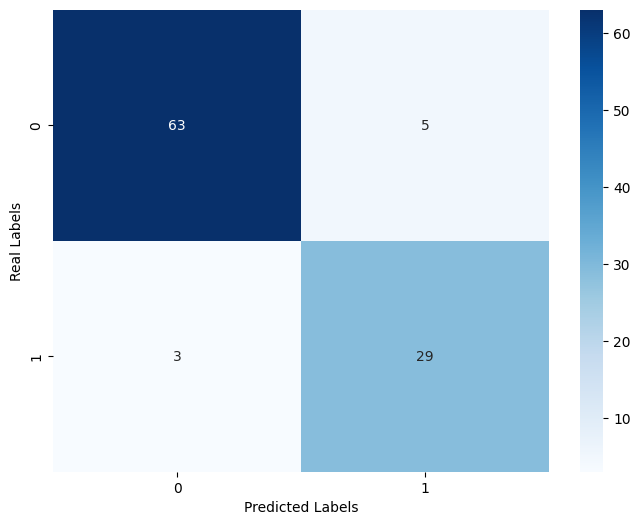

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



[Text(0.6, 0.9375, 'x[1] <= 0.433\nentropy = 0.904\nsamples = 100\nvalue = [68, 32]'),
 Text(0.3333333333333333, 0.8125, 'x[2] <= 0.664\nentropy = 0.494\nsamples = 74\nvalue = [66, 8]'),
 Text(0.13333333333333333, 0.6875, 'x[1] <= -0.211\nentropy = 0.196\nsamples = 66\nvalue = [64, 2]'),
 Text(0.06666666666666667, 0.5625, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.2, 0.5625, 'x[2] <= 0.244\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.13333333333333333, 0.4375, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.26666666666666666, 0.4375, 'x[0] <= -0.02\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.3125, 'x[2] <= 0.288\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.26666666666666666, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1875, 'x[1] <= 0.136\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.0625, 

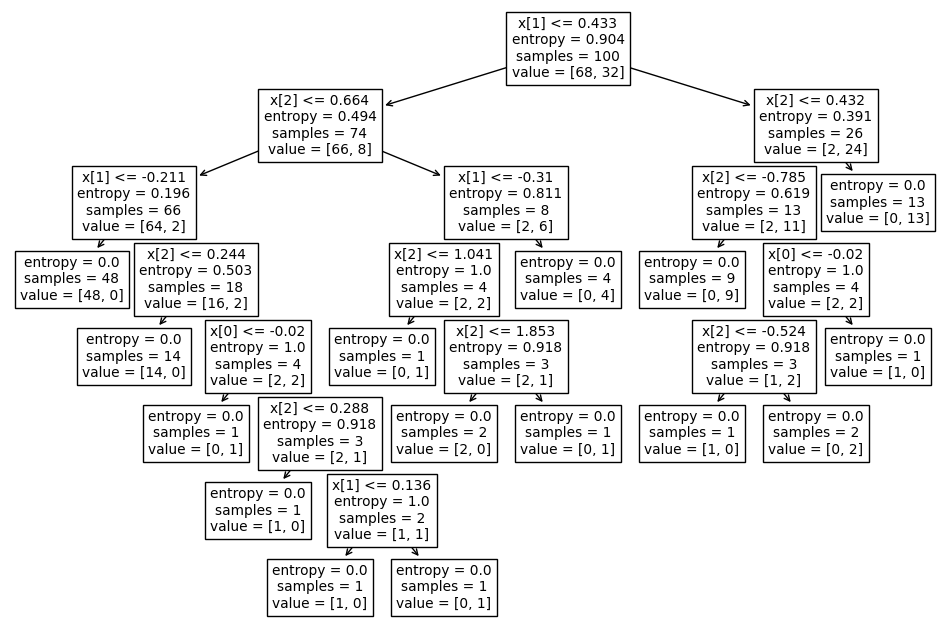

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_test, y_test))

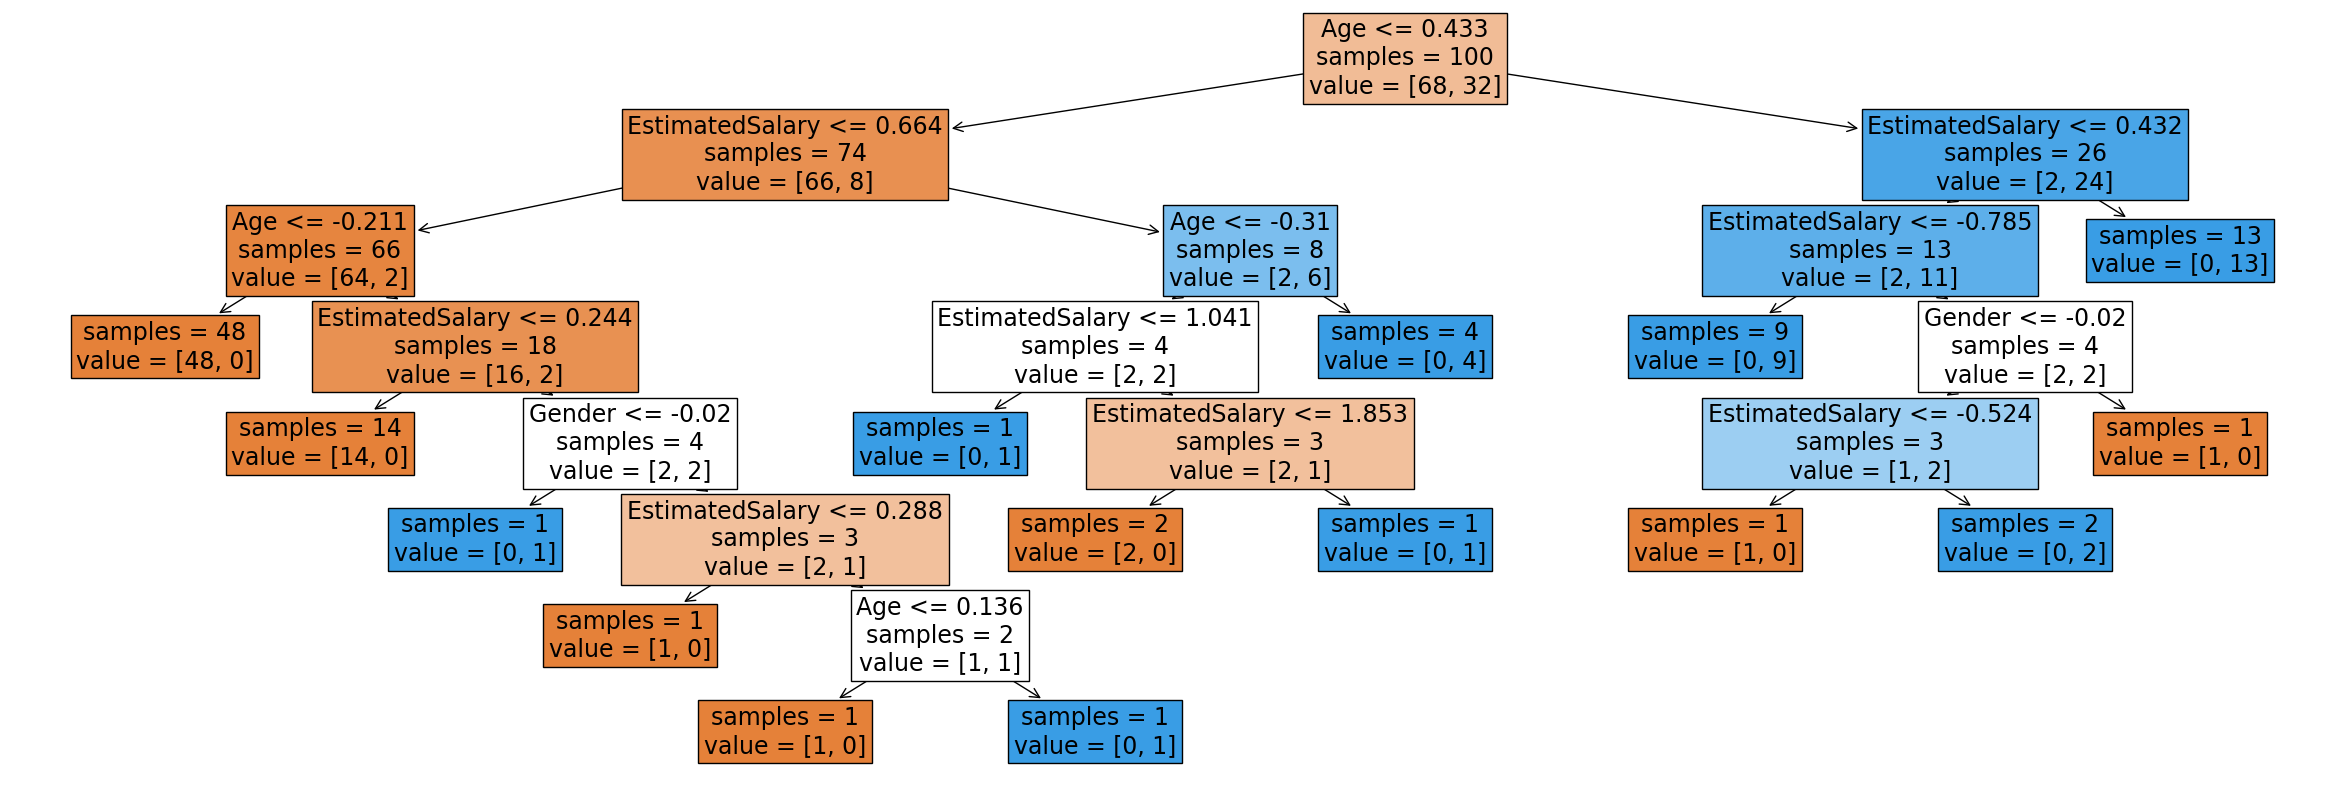

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=['Gender','Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()